Temporal Difference 
in temeporal difference it is basically a model free environment that estimates the value  function V(S) in MDP  combining the aspects of Monte carlo simulation and Dynamic programming 


V(s)=Eπ[∑γ^tRt+1∣S0=s] where t= (0,inf)

and update rule is 
V(s)←V(s)+α(Rt+1 + γ V(s′)−V(s))

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 


Value of 'hit' at state (15, 8): -0.0831951
Value of 'stick' at state (15, 8): -0.18846100000000002


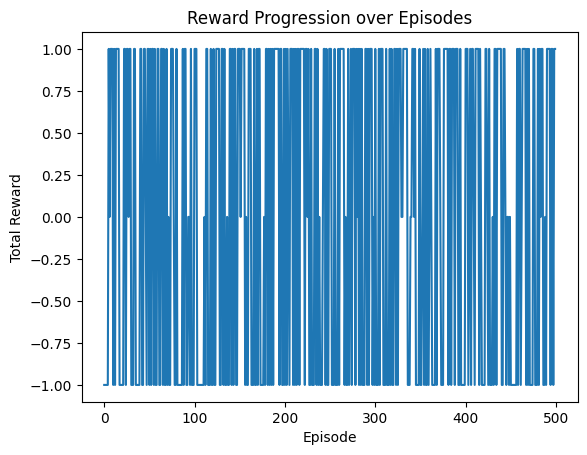

In [2]:
import random
import matplotlib.pyplot as plt

class BlackJackEnv:
    def __init__(self):
        self.reset()
    
    def reset(self):
        """Resets the environment to start a new episode."""
        self.player_hand = random.randint(12, 21)
        self.dealer_hand = random.randint(1, 10)
        self.done = False
        return self.player_hand, self.dealer_hand
    
    def step(self, action):
        """Takes an action ('hit' or 'stick') and returns the new state, reward, and done flag."""
        if action == 'hit':
            card = random.randint(1, 10)
            self.player_hand += card
            if self.player_hand > 21:
                self.done = True
                reward = -1
                return (self.player_hand, self.dealer_hand), reward, self.done
            else:
                reward = 0
                return (self.player_hand, self.dealer_hand), reward, self.done
             
        elif action == 'stick':
            while self.dealer_hand < 17:
                card = random.randint(1, 10)
                self.dealer_hand += card

            self.done = True
            if self.dealer_hand > 21 or self.player_hand > self.dealer_hand:
                reward = 1
                return (self.player_hand, self.dealer_hand), reward, self.done
            elif self.player_hand == self.dealer_hand:
                reward = 0
                return (self.player_hand, self.dealer_hand), reward, self.done
            else:
                reward = -1
                return (self.player_hand, self.dealer_hand), reward, self.done

def td_blackjack(env, episodes, alpha=0.1, gamma=0.9):
    """Implements Temporal-Difference (TD) learning for Blackjack."""
    V = {}  # State-value function (dictionary with default value 0)
    episode_rewards = []  # To track the reward of each episode
    
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0  # Track the total reward for the current episode

        while not done:
            # Epsilon-greedy policy: Explore or exploit
            if random.random() < 0.1:  # Exploration
                action = random.choice(['hit', 'stick'])
            else:  # Exploitation
                hit_val = V.get((state, 'hit'), 0)
                stick_val = V.get((state, 'stick'), 0)
                if hit_val > stick_val:
                    action = 'hit'
                else:
                    action = 'stick'

            next_state, reward, done = env.step(action)

            current_value = V.get((state, action), 0)
            next_value = (
                max(V.get((next_state, 'hit'), 0), V.get((next_state, 'stick'), 0))
                if not done else 0
            )

            # TD(0) update for state-action value
            V[(state, action)] = current_value + alpha * (reward + gamma * next_value - current_value)

            state = next_state  # Transition to next state
            total_reward += reward  # Accumulate the reward

        episode_rewards.append(total_reward)  # Store the total reward for the episode
    
    return V, episode_rewards  # Return the value function and the rewards

# Initialize environment
env = BlackJackEnv()

# Train the model using TD learning
episodes = 500
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

V, episode_rewards = td_blackjack(env, episodes, alpha, gamma)

# Display learned value for a sample state
sample_state = (15, 8)  # Player sum = 15, Dealer sum = 7
hit_value = V.get((sample_state, 'hit'), 0)
stick_value = V.get((sample_state, 'stick'), 0)

print(f"Value of 'hit' at state {sample_state}: {hit_value}")
print(f"Value of 'stick' at state {sample_state}: {stick_value}")

# Plot the reward progression over episodes
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Progression over Episodes')
plt.show()


in the above simulated environment of Blackjack we see the chances of both hitting and sticking is negative which means indicating that the agent has learned that, in this particular state, neither action leads to a good outcome (in terms of cumulative rewards). This is expected behavior in a Blackjack game where certain states, especially those where the player is in a weak position (such as having a sum close to 21), may lead to negative outcomes, either by busting or losing to the dealer.

Here’s a breakdown of what might be happening:

State (15, 8):

The player has a sum of 15, and the dealer's visible card is 8.
If the player "hits", they risk drawing a card that would bust their total (i.e., push the sum over 21).
If the player "sticks", they stand with 15, and the dealer will proceed to draw cards.
